Pandas数据规整 - 转换 - 离散化和面元划分
===

---

离散数据和连续数据

* 连续数据：
    * 例如：降雨量：0，5， 10， 100
    * 例如：年龄：0， 10， 20， 50， 100
    * 并不是用数值表示就是连续数据，例如性别用0，1表示，仍然是离散数据
* 离散数据
    * 例如：降雨量：晴，小雨，中雨，大雨，暴雨
    * 例如：年龄：幼年，少年，青年，中年，老年

离散数据和连续数据的区分方式：

    **如果在两个数据之间，可以插入新的数据，数据的应用不会出错，就是连续数据，否则就是离散数据
    或者：数据去重的数量，如果太多，就是连续数据，否则就是离散数据（多的定义不好确定）

----

为什么区分两类数据

不同数据做指标运算时候是不一样的
* 连续数据：可以做运算
    * 例如年龄，可以求平均年龄/最大/最小/年龄标准差。。。
    * 不能做分组基准（因为太多了）只能做聚合运算
* 离散数据：不能做运算，但可以做计数
    * 例如年龄：可以计数每个年龄段有多少人（频次）
    * 可以做分组基准
    
数据分析时，为了方便分析，有时需要将连续数据转为离散数据（离散化，面元划分）

（没有离散数据转连续数据的需求，因为计算出来的指标无意义（如性别计算处1.5））

---

为了便于分析，连续数据常常被离散化或拆分为“面元”（bin，分组区间）

连续数据离散化：降雨量、年龄、身高这类连续数据，要分析：只能画直方图，无法分组聚合
，所以可以将连续数据离散化，例如降雨量转为 小雨中雨大雨暴雨，年龄转为 少年青年中年老年，就可以分组聚合

In [1]:
import numpy as np
import pandas as pd

例子：一组年龄数据，将它们划分为不同的年龄组
---

划分为“18到25”、“26到35”、“35到60”以及“60以上”几个面元

In [2]:
# 年龄
ages = [18, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
# 面元区间
bins = [18, 25, 35, 60, 100]

In [3]:
cats = pd.cut(ages, bins)
cats

[NaN, (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], (18.0, 25.0], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [4]:
type(cats)

pandas.core.arrays.categorical.Categorical

返回的是categories对象（划分的面元），可看做一组表示面元名称的字符串

底层含有：

    一个codes属性中的年龄数据标签
    一个表示不同分类的类型数组

In [6]:
cats.codes  # 分组后的数据(下面分组区间的索引)

array([-1,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1], dtype=int8)

In [7]:
cats.categories  # 类型，分组区间

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [8]:
cats[1]

Interval(18, 25, closed='right')

In [14]:
# pd.cut结果的面元计数
cats.value_counts()  # 统计每个分组区间的数据个数
pd.value_counts(cats)

(18, 25]     4
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

cut方法：默认是左开右闭区间，不包含起始值，包含结束值

right=False后，左闭右开区间，包含起始值，不包含结束值

In [15]:
cats2 = pd.cut(ages, bins, right=False)
cats2

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [16]:
cats2.codes

array([0, 0, 1, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [17]:
cats2.categories

IntervalIndex([[18, 25), [25, 35), [35, 60), [60, 100)],
              closed='left',
              dtype='interval[int64]')

### 修改面元名称

In [23]:
cat3 = pd.cut(ages, bins)
cat3 = pd.cut(ages, bins, labels=False)  # 去掉面元名称
cat3 = pd.cut(ages, bins, labels=['少年', '青年', '中年', '老年'])  # 自定义面元名称
cat3

[NaN, 少年, 少年, 青年, 少年, ..., 青年, 老年, 中年, 中年, 青年]
Length: 12
Categories (4, object): [少年 < 青年 < 中年 < 老年]

In [24]:
cat3[1]

'少年'

In [25]:
cat3.codes

array([-1,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1], dtype=int8)

In [26]:
cat3.categories

Index(['少年', '青年', '中年', '老年'], dtype='object')

#### 不指定面元切分的起始结束值，而是指定面元切分的个数（切成几份），自动计算面元起始结束值

In [28]:
cat4 = pd.cut(ages, 4, precision=2)  # 将数据分为4组，限定区间浮点数位数为2
cat4

[(17.96, 28.75], (17.96, 28.75], (17.96, 28.75], (17.96, 28.75], (17.96, 28.75], ..., (28.75, 39.5], (50.25, 61.0], (39.5, 50.25], (39.5, 50.25], (28.75, 39.5]]
Length: 12
Categories (4, interval[float64]): [(17.96, 28.75] < (28.75, 39.5] < (39.5, 50.25] < (50.25, 61.0]]

In [30]:
(61 - 18) / 4

10.75

In [34]:
18 + 10.75, 28.75 + 10.75, 39.5 + 10.75, 50.25 + 10.75

(28.75, 39.5, 50.25, 61.0)

In [36]:
cat4.codes
cat4.categories

cat4.value_counts()
pd.value_counts(cat4)

(17.96, 28.75]    6
(28.75, 39.5]     3
(39.5, 50.25]     2
(50.25, 61.0]     1
dtype: int64

qcut根据样本分位数进行面元划分
---

某些数据分布情况cut可能无法使得各个面元含有相同数量的值

qcut使用样本分位数可以得到大小基本相等的面元

In [37]:
cat5 = pd.qcut(ages, 4)
cat5

[(17.999, 22.75], (17.999, 22.75], (22.75, 29.0], (22.75, 29.0], (17.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64]): [(17.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

In [38]:
cat5.value_counts()

(17.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

#### 手输入4分位数，效果一样

In [39]:
cat6 = pd.qcut(ages, [0, 0.25, 0.5, 0.75, 1])
cat6

[(17.999, 22.75], (17.999, 22.75], (22.75, 29.0], (22.75, 29.0], (17.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64]): [(17.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

In [40]:
cat6.value_counts()

(17.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

In [42]:
cat6.codes
cat6.categories

IntervalIndex([(17.999, 22.75], (22.75, 29.0], (29.0, 38.0], (38.0, 61.0]],
              closed='right',
              dtype='interval[float64]')

---

分位数和桶分析
---

Pandas有一些能根据指定面元或样本分位数将数据拆分成多块的工具（比如cut和qcut）

将这些函数跟groupby结合起来，就能实现对数据集的桶（bucket）或分位数（quantile）分析

### 例：对下面数据集进行数据分析

gender | age | grade
------ | --- | --------
male | 18 | 50
female | 28 | 90
female | 38 | 88
male | 48 | 61
。。。 | ... | ....

In [130]:
age = np.random.normal(25,5,100).astype(np.int)
grade = np.around(np.random.normal(60,10,100), decimals=1)
gender = ['male', 'female'] * 40 + ['male'] * 20

a = pd.DataFrame({'gender': gender, 'age': age, 'grade': grade})
a.head()

,gender,age,grade
0,male,20,72.4
1,female,19,51.8
2,male,22,57.4
3,female,32,65.2
4,male,19,61.4


对数据进行描述性分析

* 出指标：能出多少指标？（十几个）
    * 先1列分析，再2列组合分析，再三列组合分析
    * 对连续值分析：运算（mean(),求平均值）
    * 对离散值分析：计数（size(),频次，个数）
* 可视化

In [131]:
# 本班人数
a.shape[0]

100

单列分析

In [132]:
# 平均分
a.grade.mean()

60.644

In [133]:
# 平均年龄
a.age.mean()

24.34

In [141]:
# 最大值最小值
a.age.min(), a.age.max()

(10, 35)

2列分析

In [134]:
# 不同性别的人数
a.groupby('gender').size()
a.gender.value_counts()

male      60
female    40
Name: gender, dtype: int64

In [135]:
# 不同性别的平均年龄
a.groupby('gender')['age'].mean()

gender
female    24.425000
male      24.283333
Name: age, dtype: float64

In [136]:
# 不同性别的平均分
x = a.groupby('gender')['grade'].mean()
x

gender
female    60.53
male      60.72
Name: grade, dtype: float64

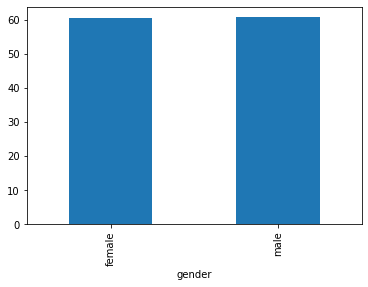

In [137]:
x.plot.bar()

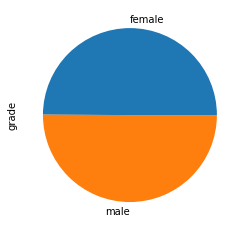

In [138]:
x.plot.pie()

因为数据只有1列离散值（可做分组基准），组合计算后指标比较少，也不能做透视表和交叉表

解决方法：将连续值列离散化后继续分析

#### 桶分析（分位数分析）

In [142]:
bins = [5, 10, 15, 20, 25, 30, 35]  # 年龄分组
a['age_cut'] = pd.cut(a.age, bins)
a.head()

,gender,age,grade,age_cut
0,male,20,72.4,"(15, 20]"
1,female,19,51.8,"(15, 20]"
2,male,22,57.4,"(20, 25]"
3,female,32,65.2,"(30, 35]"
4,male,19,61.4,"(15, 20]"


继续出指标

In [143]:
# 不同年龄段的人数
a.age_cut.value_counts()

(20, 25]    40
(25, 30]    25
(15, 20]    22
(30, 35]    12
(5, 10]      1
(10, 15]     0
Name: age_cut, dtype: int64

In [144]:
# 不同年龄段的平均分
a.groupby('age_cut')['grade'].mean()

age_cut
(5, 10]     65.300000
(10, 15]          NaN
(15, 20]    60.090909
(20, 25]    60.955000
(25, 30]    60.280000
(30, 35]    60.991667
Name: grade, dtype: float64

3列分析

In [145]:
# 不同年龄段/不同性别的个数差异
# a.groupby('age_cut')['gender'].size()  # 错误，求的是年龄段的人数，不是性别人数

# 正确方式：使用交叉表
pd.crosstab(a.age_cut, a.gender)

gender,female,male
age_cut,,
"(5, 10]",0,1
"(15, 20]",7,15
"(20, 25]",18,22
"(25, 30]",9,16
"(30, 35]",6,6


In [146]:
# 不同年龄段的平均年龄和平均成绩
a.groupby('age_cut').mean()

,age,grade
age_cut,,
"(5, 10]",10.000000,65.300000
"(10, 15]",NaN,NaN
"(15, 20]",18.636364,60.090909
"(20, 25]",23.350000,60.955000
"(25, 30]",27.680000,60.280000
"(30, 35]",32.333333,60.991667


In [147]:
# 不同年龄段/不同性别的成绩差异
# a.groupby('age_cut')['grade'].mean() # 差一个维度
a.pivot_table('grade', index='age_cut', columns='gender')

gender,female,male
age_cut,,
"(5, 10]",NaN,65.300000
"(15, 20]",58.100000,61.020000
"(20, 25]",62.288889,59.863636
"(25, 30]",60.588889,60.106250
"(30, 35]",58.000000,63.983333


考试成绩离散化后又可以来一波

略

#### 桶分析例子2

In [70]:
frame = pd.DataFrame({'data1': np.random.randn(1000), 'data2': np.random.randn(1000)})
frame.head()

,data1,data2
0,0.690169,0.334458
1,1.087660,-2.594456
2,0.216865,1.504087
3,0.252574,0.585563
4,-0.495215,0.066818


In [71]:
q = pd.cut(frame.data1, 4)
q.head()

0    (-0.921, 0.792]
1     (0.792, 2.505]
2    (-0.921, 0.792]
3    (-0.921, 0.792]
4    (-0.921, 0.792]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.64, -0.921] < (-0.921, 0.792] < (0.792, 2.505] < (2.505, 4.218]]

In [73]:
# q是Series类型，不是面元类型类型
type(q)

pandas.core.series.Series

In [74]:
# q是Series类型，不是面元类型类型
type(q.cat)

pandas.core.arrays.categorical.CategoricalAccessor

In [78]:
q.cat

q.cat.codes
q.cat.categories

IntervalIndex([(-2.64, -0.921], (-0.921, 0.792], (0.792, 2.505], (2.505, 4.218]],
              closed='right',
              dtype='interval[float64]')

In [80]:
q.value_counts()

(-0.921, 0.792]    606
(0.792, 2.505]     204
(-2.64, -0.921]    182
(2.505, 4.218]       8
Name: data1, dtype: int64

由cut返回的Categorical对象可直接传递到groupby。我们可以像下面这样对data2列做一些统计计算

In [81]:
frame.describe()

,data1,data2
count,1000.000000,1000.000000
mean,-0.000793,0.022043
std,0.991748,0.977105
min,-2.633535,-3.686072
25%,-0.671546,-0.637730
50%,-0.044528,0.027742
75%,0.651627,0.705526
max,4.217970,3.391034


In [85]:
frame.groupby(q).size()
frame.groupby(q)['data2'].mean()

data1
(-2.64, -0.921]    0.071577
(-0.921, 0.792]    0.008308
(0.792, 2.505]     0.023730
(2.505, 4.218]    -0.107421
Name: data2, dtype: float64

In [86]:
frame.groupby(q).sum()

,data1,data2
data1,,
"(-2.64, -0.921]",-256.036639,13.027102
"(-0.921, 0.792]",-39.514995,5.034517
"(0.792, 2.505]",270.916347,4.840899
"(2.505, 4.218]",23.842253,-0.859368


使用自定义函数同时计算多个指标,快速综合统计

自定义函数内构建字典或Series数据返回，会输出DataFrame

In [97]:
def aaa(x):
#     return x

    tmp = {
            'count': x.count(),
            'mean': x.mean(),
            'std': x.std(),
            'min': x.min(),
            'max': x.max(),
        }
    
#     return tmp
    return pd.Series(tmp)

frame.groupby(q).apply(aaa)
frame.groupby(q)['data2'].apply(aaa)
frame.groupby(q)['data2'].apply(aaa).unstack()
x = frame.groupby(q)['data2'].apply(aaa).unstack().T
x

data1  (-2.64, -0.921]  (-0.921, 0.792]  (0.792, 2.505]  (2.505, 4.218]
count       182.000000       606.000000      204.000000        8.000000
mean          0.071577         0.008308        0.023730       -0.107421
std           0.947343         0.988499        0.975795        0.940278
min          -3.007072        -3.686072       -2.594456       -1.282202
max           2.513581         3.391034        2.464918        1.519477

In [98]:
type(x)

pandas.core.frame.DataFrame

In [103]:
x.index
x.columns.values

[(-2.64, -0.921], (-0.921, 0.792], (0.792, 2.505], (2.505, 4.218]]
Categories (4, interval[float64]): [(-2.64, -0.921] < (-0.921, 0.792] < (0.792, 2.505] < (2.505, 4.218]]

In [108]:
x.columns.values[0]

Interval(-2.64, -0.921, closed='right')

In [109]:
# x.loc['count', '-2.64, -0.921']  # 分类值做索引，不能被直接输入查询
x.loc['count', x.columns.values[0]]

182.0

----

计算指标/哑变量（了解）
---

一种常用于统计建模或机器学习的转换方式是：将分类变量（categorical variable）转换为 哑变量、指标矩阵（虚拟变量，独热（one-hot）编码变量）

如果DataFrame的某一列含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）

pandas有一个get_dummies函数可以实现该功能

#### 独热编码的作用：将不能计算的字符串转为可以计算的数值（表格，或矩阵）

字符串：'一个对统计应用有用的方法：结合get_dummies和如cut之类的离散化函数'

    [统计,应用,有用,方法,结合,离散化,函数]
    
将人能识别的字符串，转为计算机能计算的数值
* 最简单的方法：例如性别数据，[男, 女]转为[0, 1]
    * 缺点：转后数值是分大小的，原值则不分，不很精确
* 独热编码方法：
    * [1,1,1,1,1,1,1]
    * 列表内有7个词，每个词出现的位置为1， 其他位置为0
    * 统计：[1,0,0,0,0,0,0]
    * 方法：[0,0,0,1,0,0,0]
* 词向量。。。


In [110]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [111]:
df.key

0    b
1    b
2    a
3    c
4    a
5    b
Name: key, dtype: object

手动转为独热编码

    [a,b,c]
    [1,1,1]
    
    a: [1,0,0]
    b: [0,1,0]
    c：[0,0,1]
    
    [b,b,a,c,a,b]
    b:[1,1,0,0,0,1]
    a:[0,0,1,0,1,0]

In [112]:
pd.get_dummies(df.key)

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


合并两个表格

In [113]:
dummies = pd.get_dummies(df.key, prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [114]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [115]:
df.join(dummies)  # 按索引合并

,key,data1,key_a,key_b,key_c
0,b,0,0,1,0
1,b,1,0,1,0
2,a,2,1,0,0
3,c,3,0,0,1
4,a,4,1,0,0
5,b,5,0,1,0


例子：将一组数据转为哑变量
---

一个对统计应用有用的方法：结合get_dummies和如cut之类的离散化函数

In [116]:
# 生成随机数据
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

面元划分

In [117]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
x = pd.cut(values, bins)
x

[(0.8, 1.0], (0.2, 0.4], (0.0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.4, 0.6], (0.8, 1.0], (0.6, 0.8], (0.6, 0.8], (0.6, 0.8]]
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [118]:
x.categories

IntervalIndex([(0.0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8], (0.8, 1.0]],
              closed='right',
              dtype='interval[float64]')

In [119]:
x.codes

array([4, 1, 0, 1, 2, 2, 4, 3, 3, 3], dtype=int8)

将面元划分结构进行独热编码(哑变量)

In [120]:
pd.get_dummies(x)

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

In [121]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

0.8-1.0区间下的元素：第0个和第6个